In [1]:
# Importing Libraries
import math as m
import numpy as np
import matplotlib.pyplot as plt

Note: Run all cells of Bisection before proceeding to Newton

###Using Bisection Method

In [2]:
# Reading inputs for the problem
a = float(input("Lower Limit on a = "))
b = float(input("Upper Limit on a = "))
x1 = float(input("X1 = "))
y1 = float(input("Y1 = "))
x2 = float(input("X2 = "))
y2 = float(input("Y2 = "))
L = float(input("Length of Chain = "))
tol = float(input("Tolerance = "))
N = int(input("Max no of iterations = "))

Lower Limit on a = 0.01
Upper Limit on a = 2
X1 = 1
Y1 = 6
X2 = 6
Y2 = 6
Length of Chain = 10
Tolerance = 10e-4
Max no of iterations = 100


In [3]:
# Defining function for root finding equation
def Given_Function(a,x1,y1,x2,y2,L):
  s = m.sinh((x2-x1)/(2*a))
  f = (2*a*s)-(((L**2)-((y2-y1)**2))**0.5)
  return f

In [4]:
# Defining function for Bisection method
def Bisection(a,b,x1,x2,y1,y2,L,tol,N):
  iter = 1
  FA = Given_Function(a,x1,y1,x2,y2,L)
  while (iter<N):
    p = a + ((b-a)/2) # finding midpoint of a and b
    FP = Given_Function(p,x1,y1,x2,y2,L)
    if (FP==0 or ((b-a)/2)<tol):
      print("Root = "+str(round(p,5))+" found in "+str(iter)+" iterations")
      break
    iter+=1
    if (FA*FP)>0:
      a=p
      FA=FP
    else: 
      b=p
    if iter==N:
      print("Maximum Iterations Reached")

In [5]:
# Run Bisection Method and display output
Bisection(a,b,x1,x2,y1,y2,L,tol,N)

Root = 1.14784 found in 11 iterations


Text(0, 0.5, 'y')

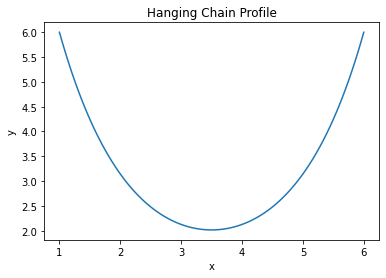

In [6]:
# Displaying the hanging chain profile
root = 1.14784 # from above output
x0 = ((x1+x2)/2)+((root/2)*(m.log((L-(y2-y1))/(L+(y2-y1)))))
c = m.cosh((x1-x0)/root)
y0 = y1 - (root*(c-1))
x = (np.linspace(x1,x2,100)).tolist()
def Profile_Function(a,x,x0,y0):
  cos = m.cosh((x-x0)/a)
  y = y0 + (a*(cos-1))
  return y
y = [Profile_Function(root,item,x0,y0) for item in x]
plt.plot(x,y)
plt.title("Hanging Chain Profile")
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
Bisection(0.1,10,3,10,4,9,20,10e-6,100)
Bisection(0.5,5,3,10,4,9,20,10e-6,100)
Bisection(1,2,3,10,4,9,20,10e-6,100)
Bisection(1.2,1.3,3,10,4,9,20,10e-6,100)
Bisection(1.285,1.295,3,10,4,9,20,10e-6,100)

Root = 1.28996 found in 20 iterations
Root = 1.28996 found in 19 iterations
Root = 1.28996 found in 17 iterations
Root = 1.28996 found in 14 iterations
Root = 1.28997 found in 10 iterations


In [ ]:
Bisection(0.1,10,3,10,4,9,20,10e-3,100)

Root = 1.28916 found in 10 iterations


In [ ]:
Bisection(0.1,10,3,10,4,9,20,10e-6,10)

Maximum Iterations Reached


In [ ]:
Bisection(0.1,10,1,7,5,3,15,10e-6,100)

Root = 1.18195 found in 20 iterations


### Using Newton Method

In [7]:
# Defining the derivative of function for root finding equation
def Df(a,x1,y1,x2,y2,L):
  s = m.sinh((x2-x1)/(2*a))
  c = m.cosh((x2-x1)/(2*a))
  f2 = (((x1-x2)/a)*c) + (2*s)
  return f2

In [8]:
# Defining function for Newton method
def Newton(p0,x1,x2,y1,y2,L,tol,N):
  iter = 1
  while (iter<N):
    p = p0 - (Given_Function(p0,x1,y1,x2,y2,L)/Df(p0,x1,y1,x2,y2,L))
    if (abs(p-p0))<tol:
      print("Root = "+str(round(p,5))+" found in "+str(iter)+" iterations")
      return (p,iter)
    iter+=1
    p0=p
    if iter==N:
      print("Maximum Iterations Reached")

In [9]:
# Reading input guess for a
p0 = float(input("Guess a = "))

Guess a = 1


In [10]:
out = Newton(p0,x1,x2,y1,y2,L,tol,N) # Calling Newton's method with guess root a=1 and other inputs as earlier

Root = 1.1482 found in 4 iterations


Text(0, 0.5, 'y')

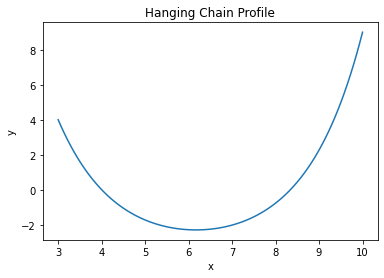

In [ ]:
# Displaying the hanging chain profile
root = round(out[0],5) # no need to explicitly assign output value; return statement can be added to bisection method similarly
x0 = ((x1+x2)/2)+((root/2)*(m.log((L-(y2-y1))/(L+(y2-y1)))))
c = m.cosh((x1-x0)/root)
y0 = y1 - (root*(c-1))
y = [Profile_Function(root,item,x0,y0) for item in x]
plt.plot(x,y)
plt.title("Hanging Chain Profile")
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
Newton(2,x1,x2,y1,y2,L,tol,N)
Newton(0.1,x1,x2,y1,y2,L,tol,N)
Newton(0.5,x1,x2,y1,y2,L,tol,N)

Root = 1.28996 found in 15 iterations
Root = 1.28996 found in 37 iterations
Root = 1.28996 found in 9 iterations


(1.2899619071857027, 9)

In [ ]:
Newton(1,1,7,5,3,15,10e-6,100)

Root = 1.18195 found in 5 iterations


(1.1819503938901241, 5)